# Chicago Crime Data Analysis 

In [417]:
%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('ggplot')

In [2]:
# import Chicago Crime data into Pandas Dataframe 
raw_data = pd.read_csv('Crimes_-_2001_to_present.csv')

In [3]:
# data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5985700 entries, 0 to 5985699
Data columns (total 22 columns):
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 970.4+ MB


In [17]:
# total crimes for each year
year_crimes = raw_data.groupby('Year')['ID'].nunique()
year_crimes

Year
2001    485712
2002    486724
2003    475890
2004    469315
2005    453624
2006    447984
2007    436877
2008    426896
2009    392476
2010    370038
2011    351362
2012    335524
2013    306436
2014    273934
2015    259088
2016     13820
Name: ID, dtype: int64

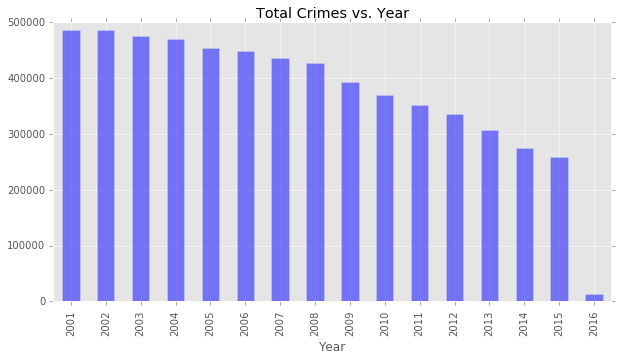

In [422]:
# plot of total crime vs. year
plt.rcParams['figure.figsize'] = 10, 5
year_crimes.plot(kind='bar', title='Total Crimes vs. Year', color='blue', alpha=0.5)

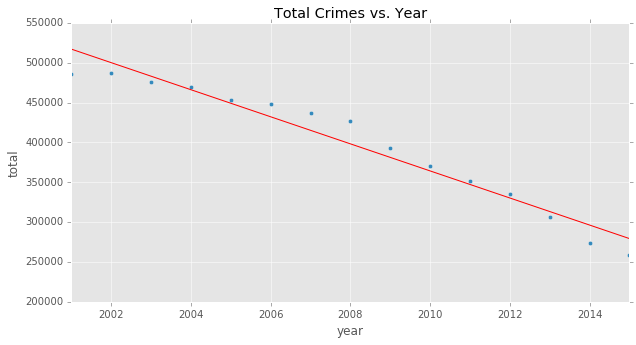

In [419]:
# total crimes per year linear regression 
plt.rcParams['figure.figsize'] = 10, 5
df = pd.DataFrame({ 'year' : year_crimes.index, 'total' : year_crimes.values } )
model = pd.ols(y=df.total[0:15], x=df.year[0:15])
model.summary_as_matrix
slope = -1.697365e+04
intercept = 3.448121e+07
prediction = slope*df.year[0:15] + intercept
df2 = pd.DataFrame({ 'year' : df.year[0:15], 'total' : prediction})
ax = df[0:15].plot(kind='scatter', x='year',y='total')
df2.plot(kind='line', x='year', y='total', ax=ax, color='red', legend=False, title="Total Crimes vs. Year")

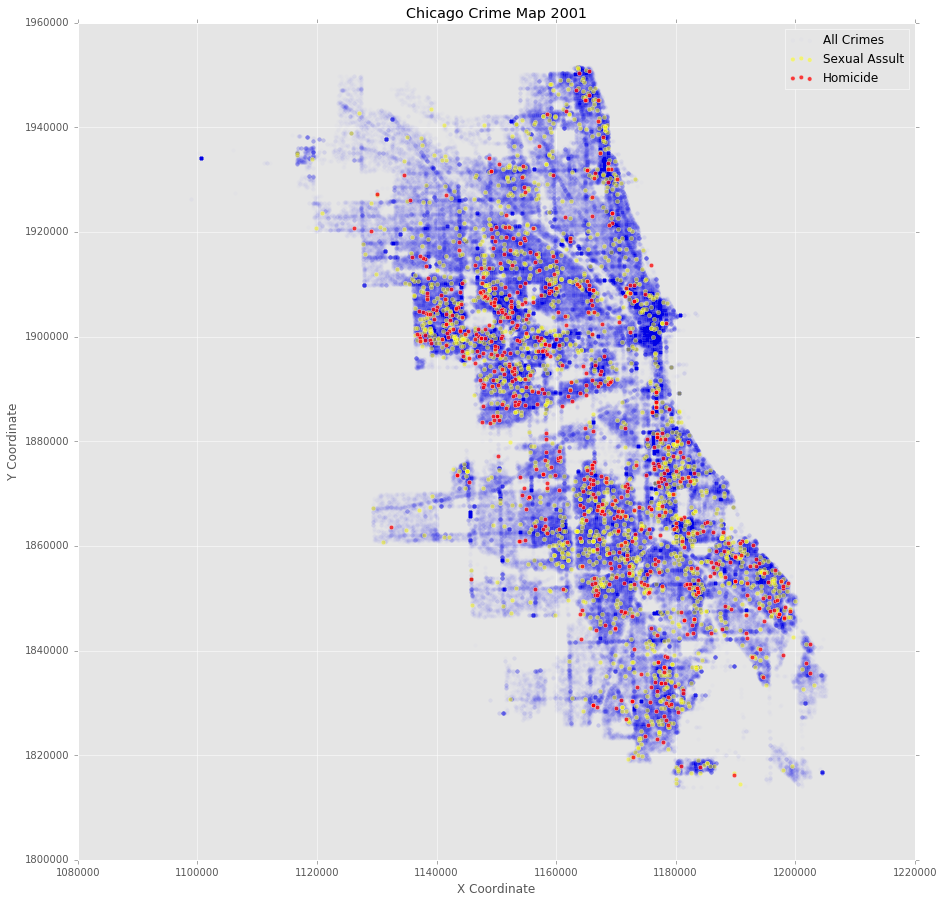

In [420]:
# crime map 2001
plt.rcParams['figure.figsize'] = 15,15
df = raw_data[ raw_data['Year'] == 2001 ]
df = df[ df['X Coordinate'] > 0 ]
plot1 = df.plot(kind='scatter',x='X Coordinate',y='Y Coordinate', alpha=0.01, color='blue')   
df[df['Primary Type'] == 'CRIM SEXUAL ASSAULT'].plot(kind='scatter',x='X Coordinate',y='Y Coordinate', alpha=0.5, color='yellow', 
                                          ax=plot1)
df[df['Primary Type'] == 'HOMICIDE'].plot(kind='scatter',x='X Coordinate',y='Y Coordinate', alpha=0.75, color='red', 
                                          ax=plot1, title='Chicago Crime Map 2001')
plt.legend(['All Crimes','Sexual Assult', 'Homicide'], loc='upper right')

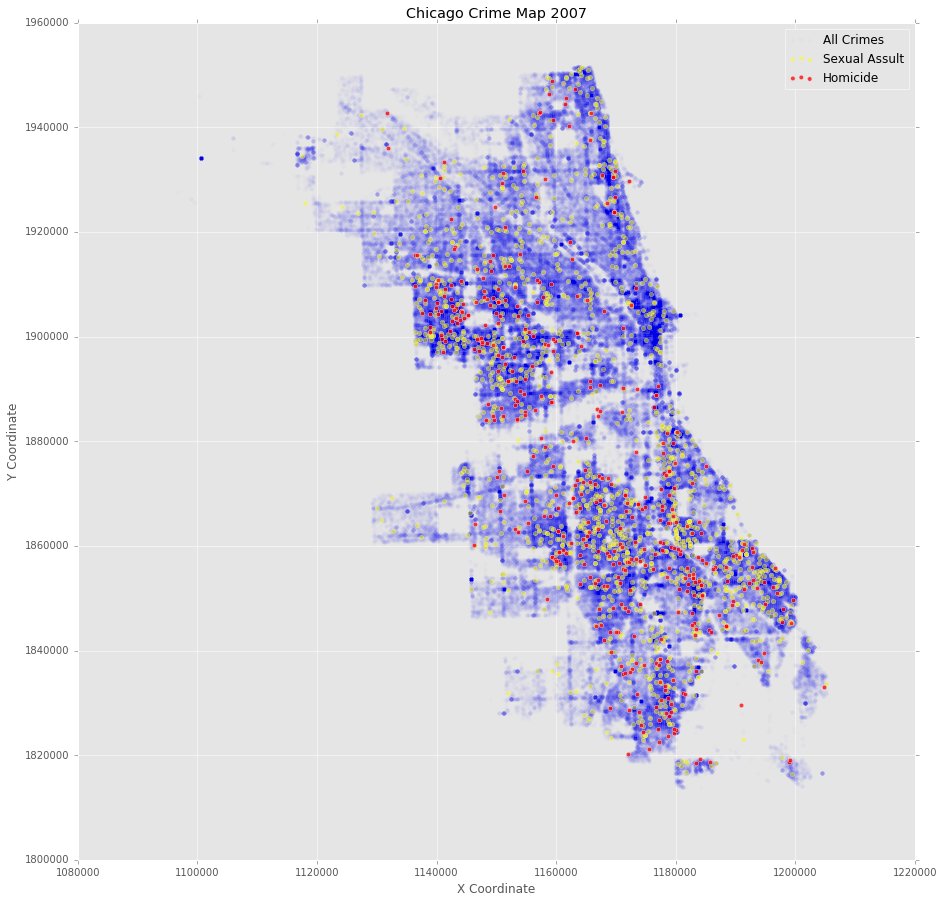

In [423]:
# crime map 2007
plt.rcParams['figure.figsize'] = 15,15
df = raw_data[ raw_data['Year'] == 2007 ]
plot1 = df.plot(kind='scatter',x='X Coordinate',y='Y Coordinate', alpha=0.01, color='blue')   
df[df['Primary Type'] == 'CRIM SEXUAL ASSAULT'].plot(kind='scatter',x='X Coordinate',y='Y Coordinate', alpha=0.5, color='yellow', 
                                          ax=plot1)
df[df['Primary Type'] == 'HOMICIDE'].plot(kind='scatter',x='X Coordinate',y='Y Coordinate', alpha=0.75, color='red', 
                                          ax=plot1, title='Chicago Crime Map 2007')
plt.legend(['All Crimes','Sexual Assult', 'Homicide'], loc='upper right')

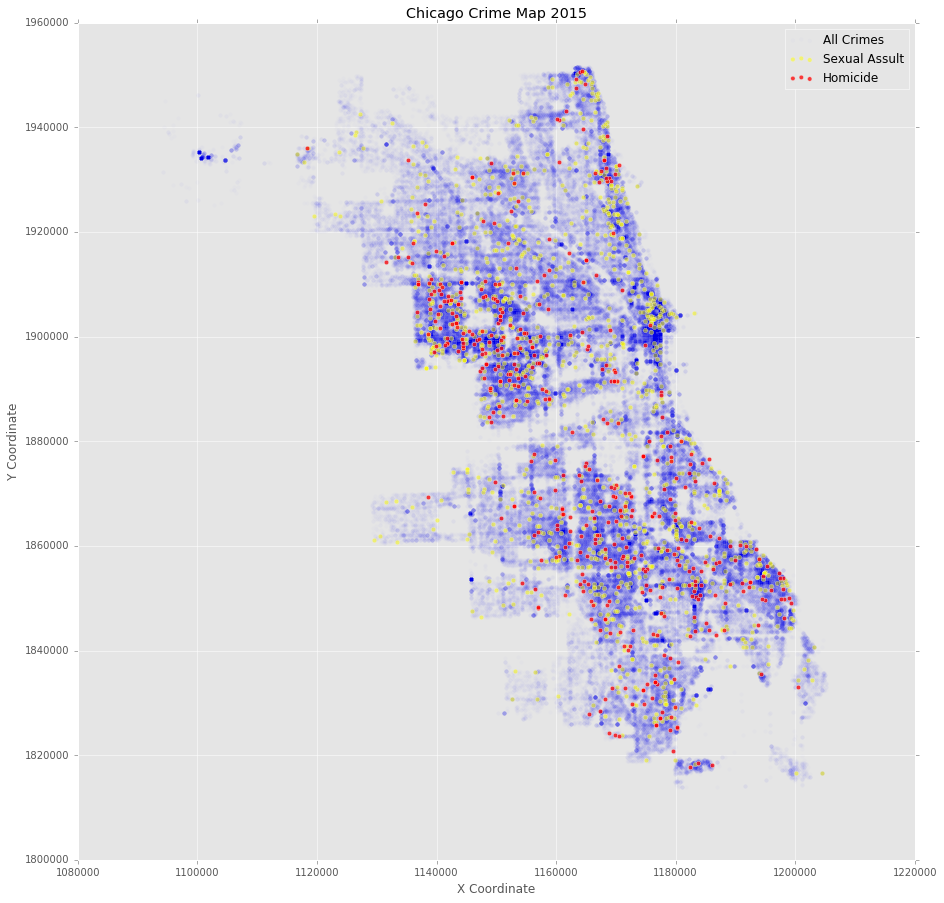

In [424]:
# crime map 2015
plt.rcParams['figure.figsize'] = 15,15
df = raw_data[ raw_data['Year'] == 2015 ]
plot1 = df.plot(kind='scatter',x='X Coordinate',y='Y Coordinate', alpha=0.01, color='blue')   
df[df['Primary Type'] == 'CRIM SEXUAL ASSAULT'].plot(kind='scatter',x='X Coordinate',y='Y Coordinate', alpha=0.5, color='yellow', 
                                          ax=plot1)
df[df['Primary Type'] == 'HOMICIDE'].plot(kind='scatter',x='X Coordinate',y='Y Coordinate', alpha=0.75, color='red', 
                                          ax=plot1, title='Chicago Crime Map 2015')
plt.legend(['All Crimes','Sexual Assult', 'Homicide'], loc='upper right')

In [102]:
# individual crime type numbers for each year
crime_year_number = raw_data.groupby('Primary Type')['Year'].value_counts()
crime_year_number

Primary Type       Year
ARSON              2002     1032
                   2001     1010
                   2003      955
                   2004      778
                   2006      726
                   2007      712
                   2005      691
                   2008      644
                   2009      616
                   2010      522
                   2011      504
                   2012      469
                   2015      450
                   2014      399
                   2013      364
                   2016       27
ASSAULT            2002    31521
                   2001    31383
                   2003    29477
                   2004    28850
                   2005    27066
                   2007    26314
                   2006    25945
                   2008    25447
                   2009    22861
                   2010    21535
                   2011    20410
                   2012    19897
                   2013    17971
                   

In [105]:
# individual crime type percenage of total crime per year
crime_year_number2 = (crime_year_number[:]).astype(float)
for x in range(0,len(crime_year_number2)):
    year = crime_year_number2.index[x][1]
    total_crimes = year_crimes[year] 
    crime_year_number2[x] = crime_year_number2[x] / float(total_crimes) * 100
crime_year_number2

Primary Type       Year
ARSON              2002     0.212030
                   2001     0.207942
                   2003     0.200677
                   2004     0.165774
                   2006     0.162059
                   2007     0.162975
                   2005     0.152329
                   2008     0.150856
                   2009     0.156952
                   2010     0.141067
                   2011     0.143442
                   2012     0.139781
                   2015     0.173686
                   2014     0.145656
                   2013     0.118785
                   2016     0.195369
ASSAULT            2002     6.476155
                   2001     6.461236
                   2003     6.194078
                   2004     6.147257
                   2005     5.966616
                   2007     6.023206
                   2006     5.791501
                   2008     5.960937
                   2009     5.824815
                   2010     5.819673
              

In [106]:
# top crime type numbers per year
year_crime_number = raw_data.groupby('Year')['Primary Type'].value_counts()
year_crime_number

Year  Primary Type                     
2001  THEFT                                99263
      BATTERY                              93448
      CRIMINAL DAMAGE                      55851
      NARCOTICS                            50567
      ASSAULT                              31383
      OTHER OFFENSE                        29656
      MOTOR VEHICLE THEFT                  27549
      BURGLARY                             26011
      ROBBERY                              18441
      DECEPTIVE PRACTICE                   14888
      CRIMINAL TRESPASS                    13240
      PROSTITUTION                          6026
      WEAPONS VIOLATION                     4274
      PUBLIC PEACE VIOLATION                2750
      OFFENSE INVOLVING CHILDREN            2233
      SEX OFFENSE                           2226
      CRIM SEXUAL ASSAULT                   1794
      LIQUOR LAW VIOLATION                  1637
      ARSON                                 1010
      GAMBLING               

In [113]:
# top crime type percentage per year
year_crime_number2 = (year_crime_number[:]).astype(float)
for x in range(0,len(year_crime_number2)):
    year = year_crime_number2.index[x][0]
    total_crimes = year_crimes[year] 
    year_crime_number2[x] = year_crime_number2[x] / float(total_crimes) * 100
year_crime_number2

Year  Primary Type                     
2001  THEFT                                20.436596
      BATTERY                              19.239385
      CRIMINAL DAMAGE                      11.498789
      NARCOTICS                            10.410902
      ASSAULT                               6.461236
      OTHER OFFENSE                         6.105676
      MOTOR VEHICLE THEFT                   5.671880
      BURGLARY                              5.355231
      ROBBERY                               3.796694
      DECEPTIVE PRACTICE                    3.065191
      CRIMINAL TRESPASS                     2.725895
      PROSTITUTION                          1.240653
      WEAPONS VIOLATION                     0.879945
      PUBLIC PEACE VIOLATION                0.566179
      OFFENSE INVOLVING CHILDREN            0.459737
      SEX OFFENSE                           0.458296
      CRIM SEXUAL ASSAULT                   0.369355
      LIQUOR LAW VIOLATION                  0.337031
      

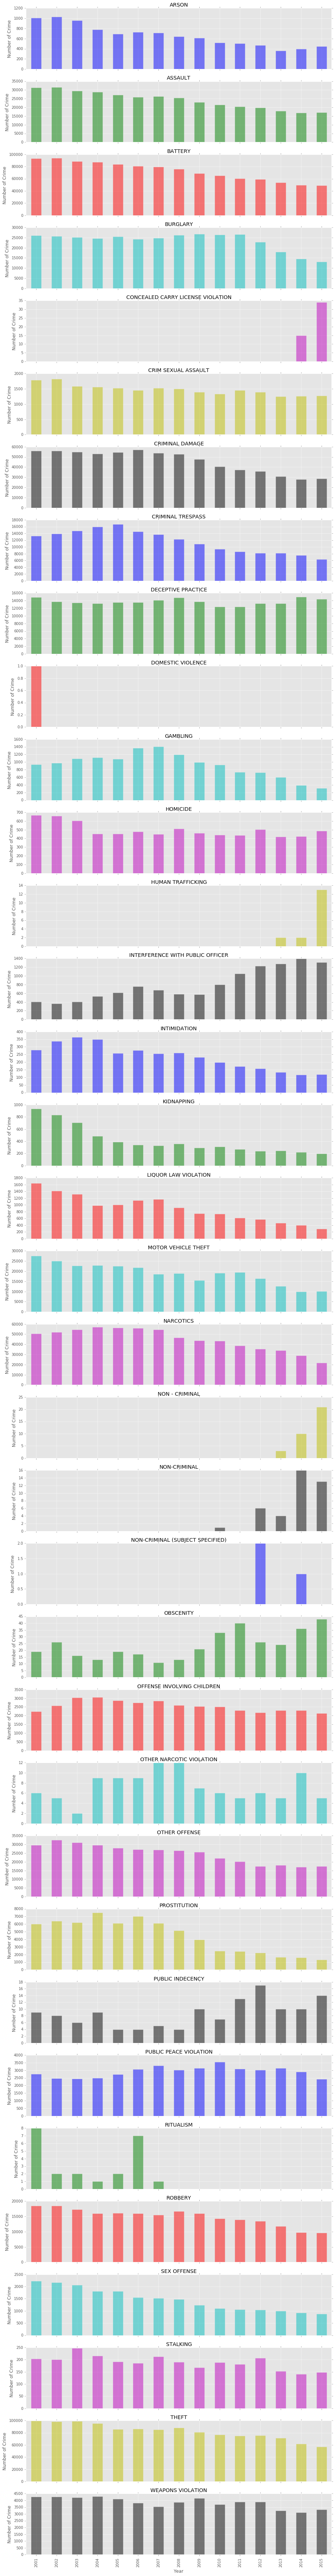

In [432]:
# plot of crime type numbers vs. year (removed 2016 due to partial data)
plt.rcParams['figure.figsize'] = 15, 125 
df = year_crime_number.unstack()
df['Year'] = df.index
df = df[df['Year'] < 2016]
df = df.drop('Year', axis=1)
axes = df.plot(subplots=True, kind='bar', legend=False, alpha=0.5)
for each in axes:
    each.set_ylabel('Number of Crime')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2ff9e87d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x30442c510>], dtype=object)

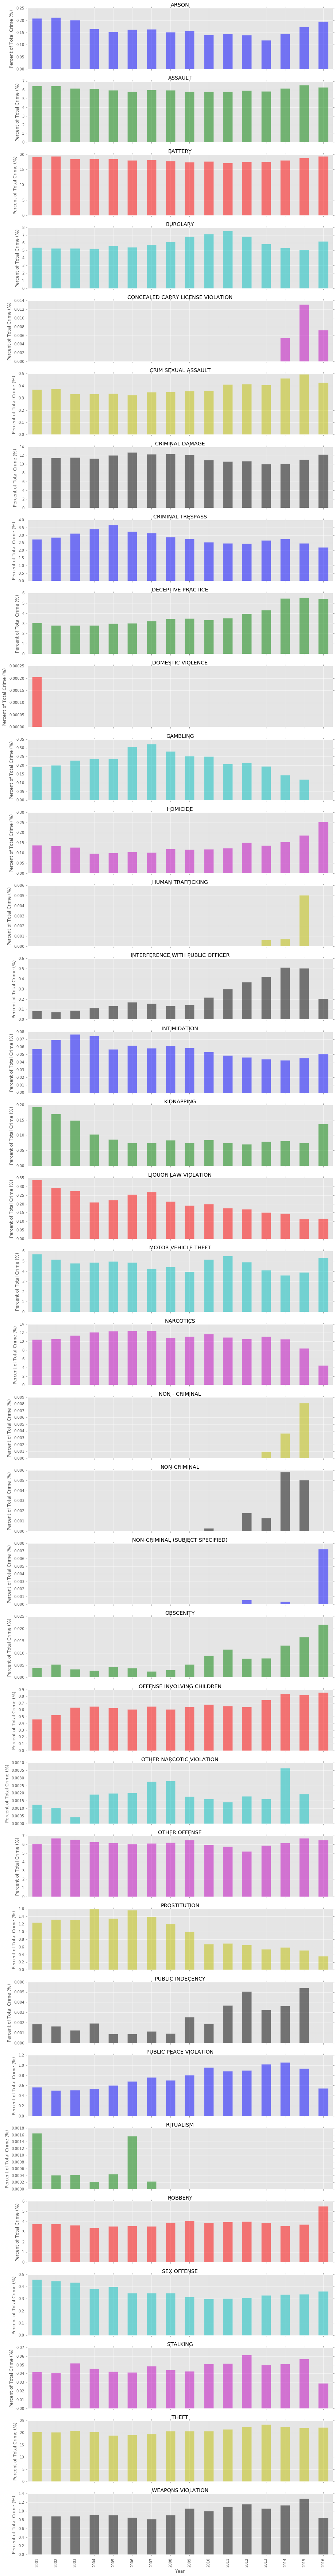

In [427]:
# plot of crime type percentage vs. year
plt.rcParams['figure.figsize'] = 15, 125 
axes = year_crime_number2.unstack().plot(subplots=True, kind='bar', legend=False, alpha=0.5)
for each in axes:
    each.set_ylabel('Percent of Total Crime (%)')
axes